## Forecast Model Intro

In [17]:
#!pip install --upgrade pandas
#!pip install pandas==0.22 

In [62]:
#!pip install --user numpy==1.15.4

  Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5


transformers 4.5.1 requires filelock, which is not installed.
transformers 4.5.1 requires regex!=2019.12.17, which is not installed.
transformers 4.5.1 requires requests, which is not installed.
transformers 4.5.1 requires sacremoses, which is not installed.
transformers 4.5.1 requires tokenizers<0.11,>=0.10.1, which is not installed.
transformers 4.5.1 requires tqdm>=4.27, which is not installed.
umap-learn 0.5.1 has requirement numpy>=1.17, but you'll have numpy 1.15.4 which is incompatible.
umap-learn 0.5.1 has requirement scikit-learn>=0.22, but you'll have scikit-learn 0.20.3 which is incompatible.
transformers 4.5.1 has requirement numpy>=1.17, but you'll have numpy 1.15.4 which is incompatible.
mkl-fft 1.2.0 has requirement numpy>=1.16, but you'll have numpy 1.15.4 which is incompatible.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\rapeng\\AppData\\Local\\Temp\\pip-uninstall-aa8zd5f9\\users\\rapeng\\appdata\\roaming\\python\\p

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.__version__

'1.16.5'

In [3]:
pd.__version__

'0.23.4'

In [4]:
df = pd.read_csv('../Data/airline_passengers.csv',index_col = 'Month',parse_dates = True)

In [5]:
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [6]:
df.tail()

Thousands of Passengers
Month                              
1960-08-01                      606
1960-09-01                      508
1960-10-01                      461
1960-11-01                      390
1960-12-01                      432

In [7]:
#I found this step doesn't affect the model's prediction result
df.index.freq = 'MS'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
train_data = df.iloc[:108] #loc[:'1940-01-01']
test_data = df.iloc[108:]

In [10]:
train_data.tail()

Thousands of Passengers
Month                              
1957-08-01                      467
1957-09-01                      404
1957-10-01                      347
1957-11-01                      305
1957-12-01                      336

In [11]:
test_data.head()

Thousands of Passengers
Month                              
1958-01-01                      340
1958-02-01                      318
1958-03-01                      362
1958-04-01                      348
1958-05-01                      363

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [13]:
fitted_moddel = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend = 'mul',
                                    seasonal = 'mul',
                                    seasonal_periods = 12).fit()

In [14]:
#Forecast with the model
test_predictions = fitted_moddel.forecast(36)

In [15]:
test_predictions

1958-01-01    348.198622
1958-02-01    341.565611
1958-03-01    397.781479
1958-04-01    388.660709
1958-05-01    391.775012
1958-06-01    451.347195
1958-07-01    502.144656
1958-08-01    498.389692
1958-09-01    439.418072
1958-10-01    383.514881
1958-11-01    336.903554
1958-12-01    381.276994
1959-01-01    392.150453
1959-02-01    384.680182
1959-03-01    447.991971
1959-04-01    437.719920
1959-05-01    441.227330
1959-06-01    508.319090
1959-07-01    565.528528
1959-08-01    561.299589
1959-09-01    494.884199
1959-10-01    431.924553
1959-11-01    379.429650
1959-12-01    429.404186
1960-01-01    441.650162
1960-02-01    433.236946
1960-03-01    504.540349
1960-04-01    492.971695
1960-05-01    496.921832
1960-06-01    572.482338
1960-07-01    636.913113
1960-08-01    632.150370
1960-09-01    557.351610
1960-10-01    486.444800
1960-11-01    427.323659
1960-12-01    483.606297
Freq: MS, dtype: float64

In [16]:
train_data['Thousands of Passengers'].plot(legend=True,label = 'TRAIN',figsize = [12,8])
test_data['Thousands of Passengers'].plot(legend=True,label = 'TEST',color = 'red')
test_predictions.plot(legend=True,label = 'PREDICTION',xlim=['1958-01-01','1960-12-01'])

## Evaluating Forecast Predictions
- MAE (issue, we want to find prediction errors that are very large)
- MSE (large errors are noted more than MAE, punish model with large error)
- RMSE (We a metrics that don't change the unit, RMSE is better than MSE)

## Forecast Model Intro Part 2

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
mean_absolute_error(test_data,test_predictions)

30.23194206916297

In [19]:
mean_squared_error(test_data,test_predictions)

1142.7772577364292

In [20]:
np.sqrt(mean_squared_error(test_data,test_predictions))

33.80498865162403

In [21]:
#Forecast on the future wiith holt-winter triple smoothing model
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend = 'mul',seasonal = 'mul',seasonal_periods = 12).fit()

In [22]:
forecast_predictions = final_model.forecast(36)

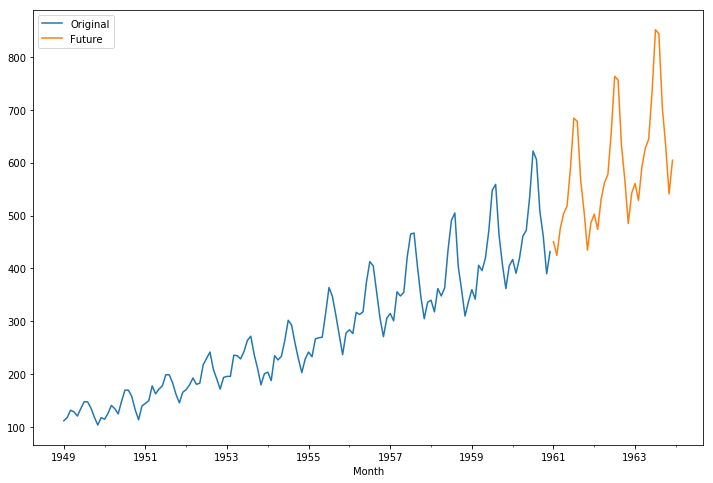

In [23]:
df['Thousands of Passengers'].plot(figsize = (12,8),legend=True,label = 'Original')
forecast_predictions.plot(legend=True,label = 'Future')

In [24]:
df2 = pd.read_csv('../Data/Samples.csv', index_col = 0, parse_dates = True)

In [25]:
df2.head()

a   b  c   d
1950-01-01  36  27  0  67
1950-02-01  58  22  3  31
1950-03-01  61  17  5  67
1950-04-01  37  15  8  47
1950-05-01  66  13  8  62

In [26]:
df2['a'].plot()
#no seasonality and trend. Stationary

In [27]:
df2['b'].plot()
#non-stationary: with trend or some seasonality or both
#Test weather stationary or non-stationary with stat test in next part

In [28]:
from statsmodels.tsa.statespace.tools import diff

In [29]:
df2['b'].head()

1950-01-01    27
1950-02-01    22
1950-03-01    17
1950-04-01    15
1950-05-01    13
Name: b, dtype: int64

In [30]:
(df2['b'] - df2['b'].shift(1)).head(5)

1950-01-01    NaN
1950-02-01   -5.0
1950-03-01   -5.0
1950-04-01   -2.0
1950-05-01   -2.0
Name: b, dtype: float64

In [31]:
#Use diff function from statsmodels
diff(df2['b'],k_diff = 1).head() #It removes the null value automatically

1950-02-01   -5.0
1950-03-01   -5.0
1950-04-01   -2.0
1950-05-01   -2.0
1950-06-01    3.0
Name: b, dtype: float64

In [32]:
diff(df2['b'],k_diff = 1).plot()

## ACF and PACF
- Autocorrelation: correlation of the series with itself lag by n period
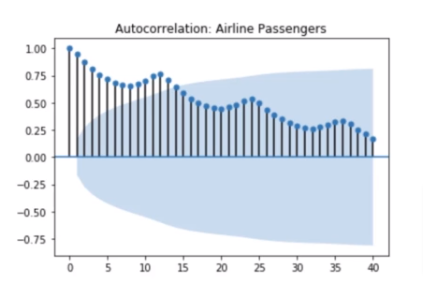
The example above x-axis represents the time shift (e.g. lag by 1d, 2d, etc.)
<br> The y-axis represents the correlation of that lag

- PACF: the relationship between previous day's residuals vs the real values of the current day
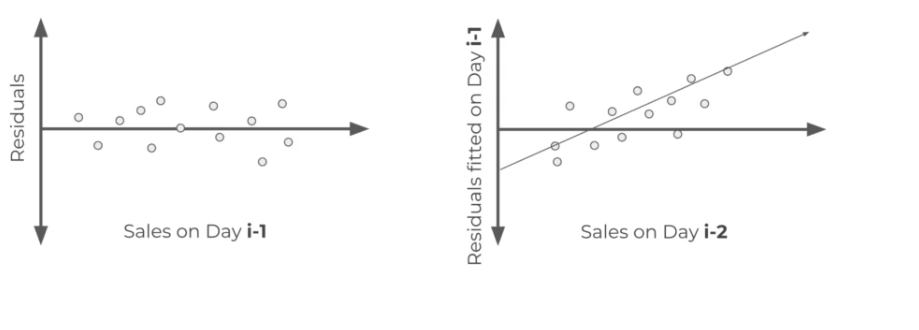
- The ACF and PACF can help choose order parameters for ARIMA based models
- Usually it's easier to perform a grid search of parameter values rather than using these plots directly
- For more details, check the explaination notebook

In [33]:
import pandas as pd
import numpy as np

In [34]:
import statsmodels.api as sm

In [35]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [36]:
# Non stationary dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col = 'Month',parse_dates = True)
df1.index.freq = 'MS'

In [37]:
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col = 'Date',parse_dates = True)
df2.index.freq = 'D'

In [38]:
df1.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [39]:
df2.head()

Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})

In [42]:
df

a
0  13
1   5
2  11
3  12
4   9

In [43]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [44]:
#There are differe ways of using partial auto-correlation function
pacf_yw(df['a'],nlags = 4,method = 'unbiased')  #yw = yule walker,use max likelihood est

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [45]:
pacf_ols(df['a'],nlags = 4) #ordinary least square.

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [46]:
from pandas.plotting import lag_plot 
#useful for plotting time series plot with the lag of itself

In [47]:
lag_plot(df1['Thousands of Passengers'])

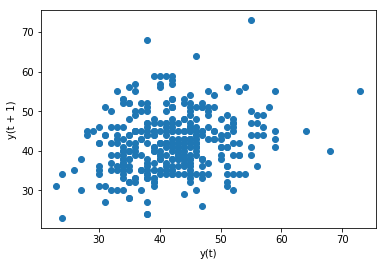

In [48]:
lag_plot(df2['Births'])

In [49]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

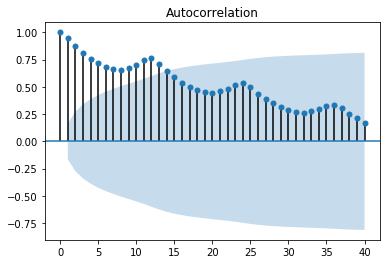

In [50]:
plot_acf(df1,lags = 40);
#usually we don't need to see all the lags
#We can observe seasonality from the following graph
#The shaded region represents the 95% CI
#The points outside the 95% can very likely to be real correlation

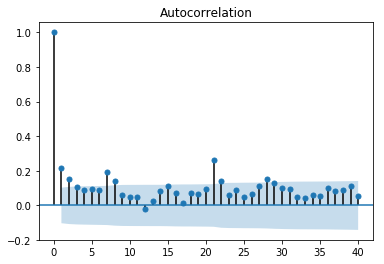

In [51]:
plot_acf(df2,lags = 40);

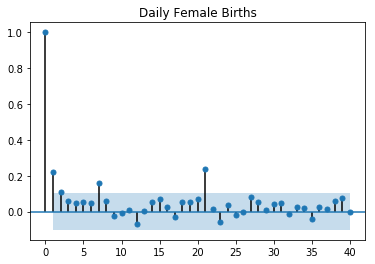

In [52]:
plot_pacf(df2,lags=40,title='Daily Female Births');

## ARIMA
- It's not capable of predicting any time series data such as stock price
- Make sure to use all useful links in the arima notebook for other case of forecasting
- 3 components: AR(autoregression: current and previous), I(differencing), MA(q)
- Stationary: constant mean and variance overtime
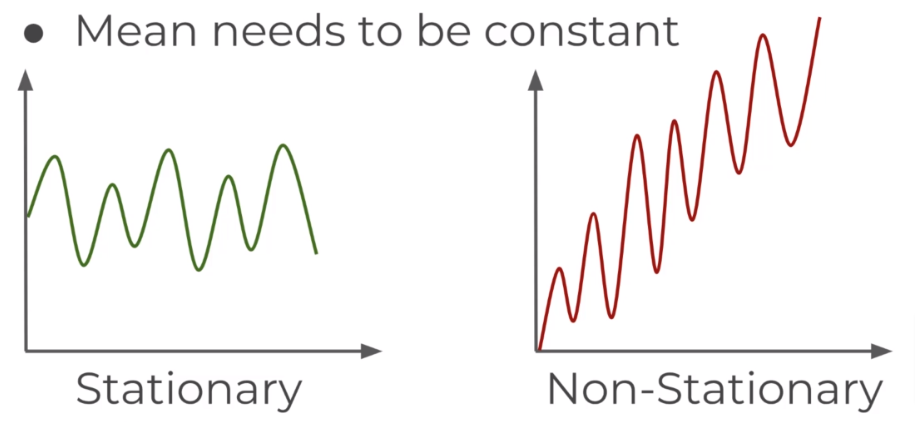
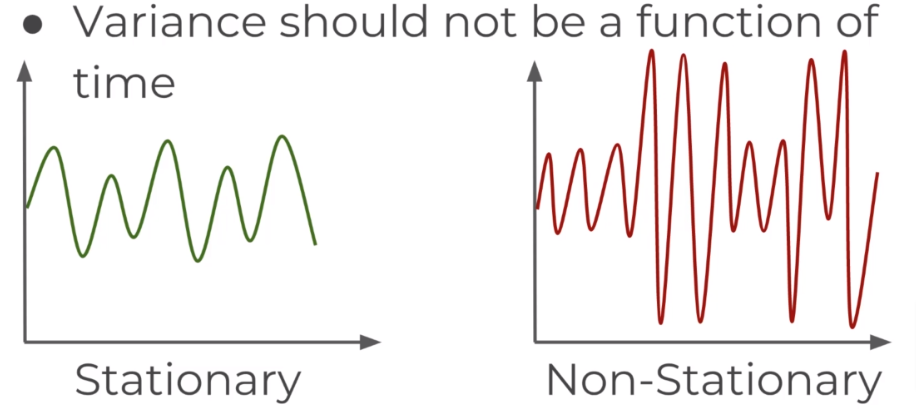
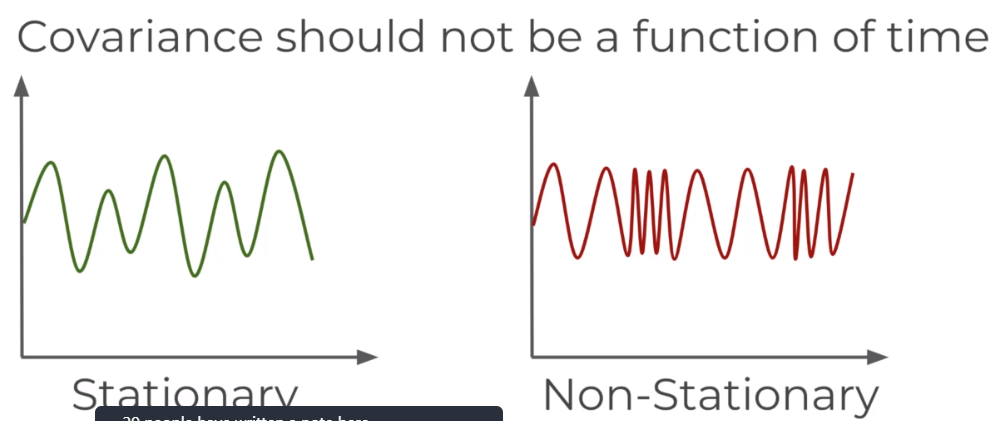

- Use Augmented DF test to see if a series is stationary or not
- Use differencing to make non-stationary data stationary

#### How to chose parameters in ARIMA
Method 1. Reading ACF & PACF
<br>
Method 2. Grid Search (Recommended)

## Autoregression - AR Model
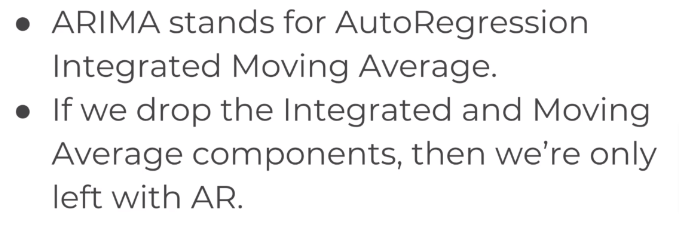
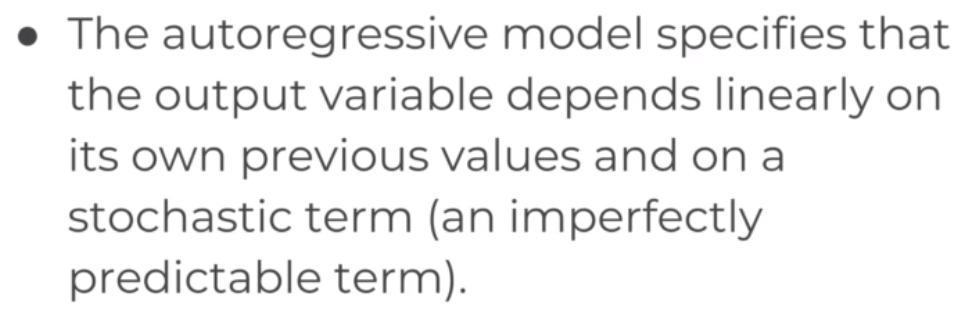
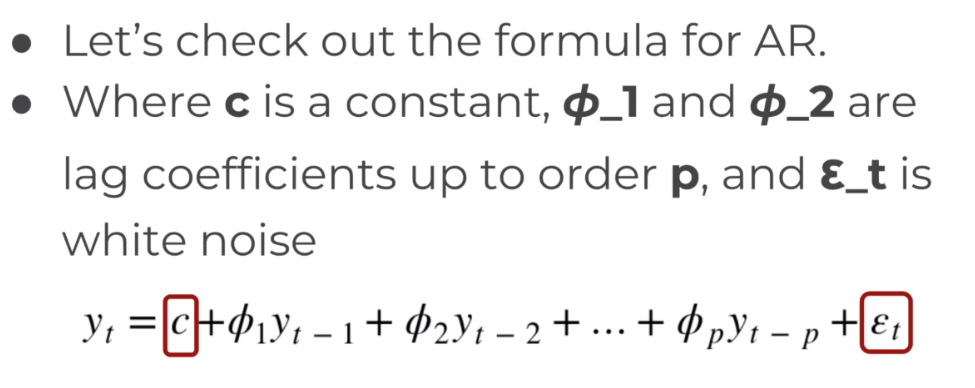
- We can have different number of AR components. E.g. AR1, only use previous ts to predict current ts
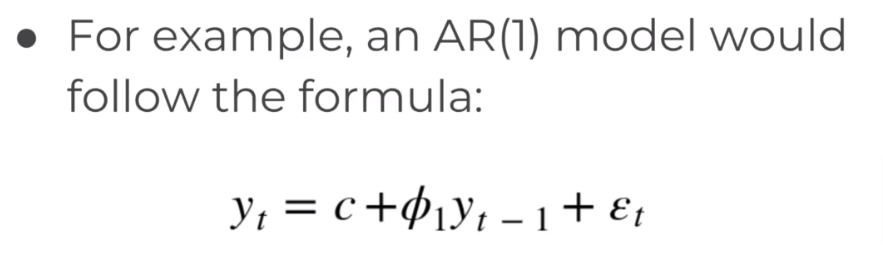

In [53]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR,ARResults

In [54]:
df = pd.read_csv('../Data/uspopulation.csv',index_col = 'DATE',parse_dates = True)

In [55]:
df.head()

PopEst
DATE              
2011-01-01  311037
2011-02-01  311189
2011-03-01  311351
2011-04-01  311522
2011-05-01  311699

In [56]:
df.tail()

PopEst
DATE              
2018-08-01  327698
2018-09-01  327893
2018-10-01  328077
2018-11-01  328241
2018-12-01  328393

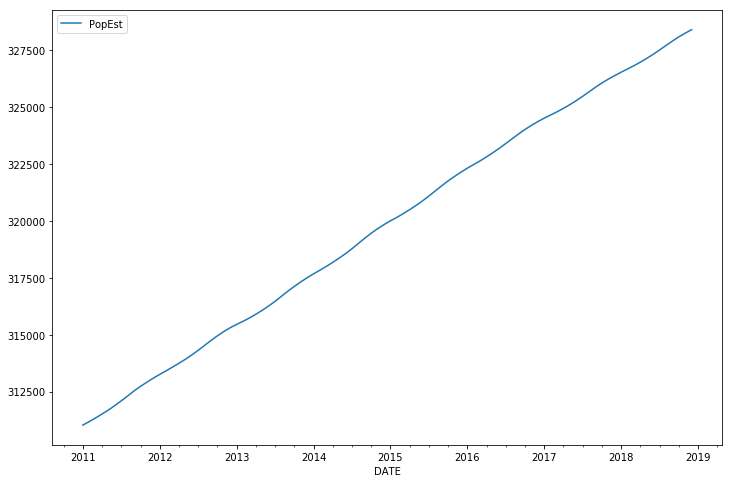

In [57]:
df.plot(figsize = (12,8))

In [58]:
len(df)

96

In [59]:
train = df.iloc[:84]

In [60]:
test = df.iloc[84:]

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
model = AR(train['PopEst'])

In [63]:
AR1fit = model.fit(maxlag=1)

In [64]:
AR1fit.k_ar #tell you how many lags

1

In [65]:
AR1fit.params #return you the constant plus the coefficient variable

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [66]:
start = len(train)
end = start + len(test) - 1

In [67]:
start

84

In [68]:
end

95

In [69]:
AR1fit.predict(start = start, end = end) 
#predict value in the test data

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [70]:
predictions1 = AR1fit.predict(start = start, end = end) 

In [71]:
predictions1 = predictions1.rename('AR1 Predictions')
#rename in order to make it show in the legend

In [72]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR1 Predictions, dtype: float64

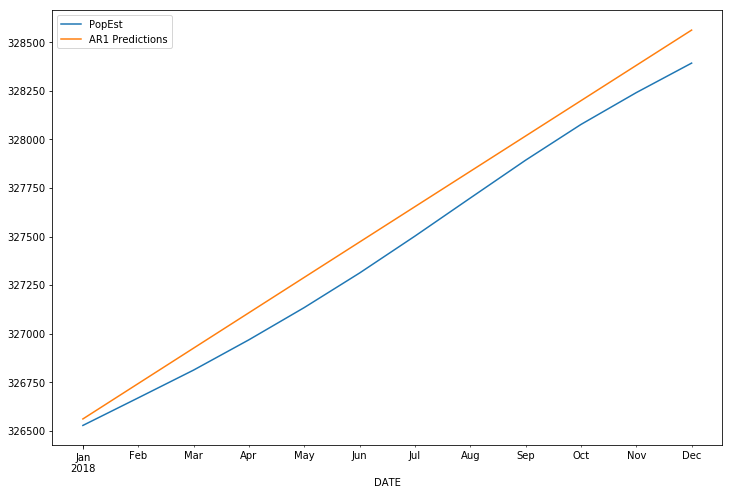

In [73]:
test.plot(figsize = (12,8), legend = True)
predictions1.plot(legend = True)

In [74]:
model = AR(train['PopEst'])

In [75]:
#Already created the model based on the training data, just need to fit it again here
#Use two alg time in the past to predict current timestamp
AR2fit = model.fit(maxlag = 2)

In [76]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [77]:
predictions2 = AR2fit.predict(start = start, end = end) 
predictions2 = predictions2.rename('AR2 Predictions')

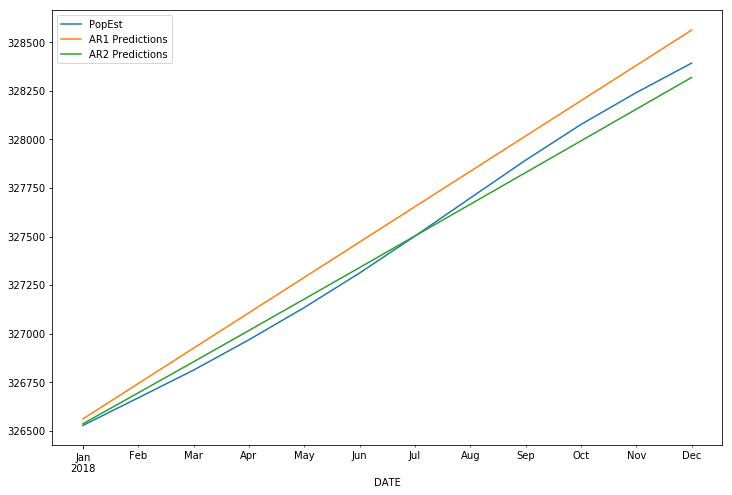

In [78]:
test.plot(figsize = (12,8), legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)

In [79]:
#We can let stats model to choose the best AR parameter (p) for us

In [80]:
model = AR(train['PopEst'])

In [81]:
ARfit = model.fit(ic = 't-stat')
#Criterion used for selecting the optimal lag length.
#AIC, BIC, t-stat, etc.
#different criterian can be used to different dataset

In [82]:
ARfit.params #It select 8 lag

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [83]:
predictions8 = ARfit.predict(start = start, end = end) 
predictions8 = predictions8.rename('AR8(Optimal) Predictions')

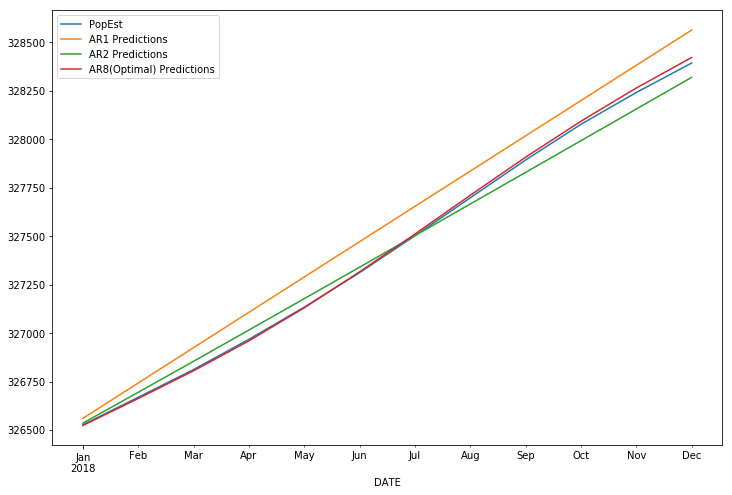

In [84]:
test.plot(figsize = (12,8), legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)
predictions8.plot(legend = True)

In [85]:
#Evaluation and comparison
from sklearn.metrics import mean_squared_error

In [86]:
labels = ['AR1','AR2','AR8']
preds = [predictions1,predictions2,predictions8]

In [87]:
for i in range(3):
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} MSE was: {error}')

AR1 MSE was: 17449.71423587912
AR2 MSE was: 2713.258667805521
AR8 MSE was: 186.9783771797175


In [88]:
#Forecast into future data 
model = AR(df['PopEst'])
ARfit = model.fit() #stats model will figure out for us

forecasted_values = ARfit.predict(start=len(df), end=len(df)+12).rename('Forecast')

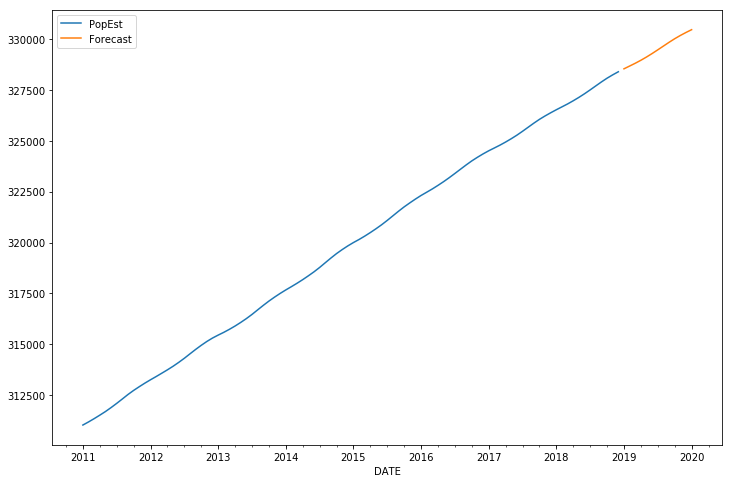

In [89]:
df['PopEst'].plot(figsize=(12,8),legend = True)
forecasted_values.plot(legend = True)

In [90]:
forecasted_values

2019-01-01    328537.420473
2019-02-01    328673.215523
2019-03-01    328810.443284
2019-04-01    328957.593034
2019-05-01    329117.336046
2019-06-01    329289.277408
2019-07-01    329470.144474
2019-08-01    329655.073868
2019-09-01    329839.483306
2019-10-01    330015.435317
2019-11-01    330175.676392
2019-12-01    330322.580631
2020-01-01    330459.617857
Freq: MS, Name: Forecast, dtype: float64

## Descriptive Statistics and Tests
- Determine if a TS is stationary
- If it's independent
- If two series demonstrate causality

### 1. Augmented Dickey-Fuller Test for Stationarity Test
- Perform a classic null hypothesis test and returns a p value
- See if p-value > 0.05

In [91]:
import pandas as pd
import numpy as np
%matplotlib inline

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load a seasonal dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasonal dataset
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [92]:
df1.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

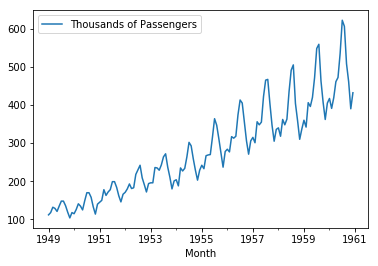

In [93]:
df1.plot()

In [94]:
from statsmodels.tsa.stattools import adfuller

In [95]:
print(adfuller(df1['Thousands of Passengers']))

(0.8153688792060433, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [96]:
type(adfuller(df1['Thousands of Passengers']))

tuple

In [97]:
#help(adfuller) 
#Check what it returns

In [98]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

In [99]:
dftest[0:4]

(0.8153688792060433, 0.9918802434376409, 13, 130)

In [100]:
dftest[4]

{'1%': -3.4816817173418295,
 '5%': -2.8840418343195267,
 '10%': -2.578770059171598}

In [101]:
dftest[4]

{'1%': -3.4816817173418295,
 '5%': -2.8840418343195267,
 '10%': -2.578770059171598}

In [102]:
for key,val in dftest[4].items(): #return each key val of each item under dict
    dfout[f'critical valule({key})'] = val

In [103]:
dfout # we just care about the p value here

ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical valule(1%)      -3.481682
critical valule(5%)      -2.884042
critical valule(10%)     -2.578770
dtype: float64

In [104]:
#Function for ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [105]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


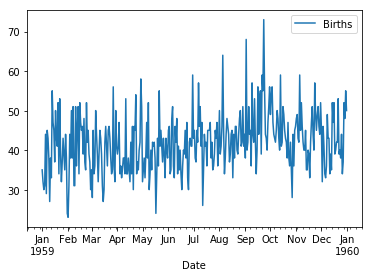

In [106]:
#Test on df2
df2.plot()

In [107]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### 2. Granger Causality Tests
- Determine if one time series is useful in forecasting another
- It's easy to measure correlations between series. It's another thing to observe changes in one series correlated to changes in another after a consistent amount of time
- It could always some outside factor unaccounted for!

In [108]:
df3 = pd.read_csv('../Data/samples.csv',index_col = 0, parse_dates = True)

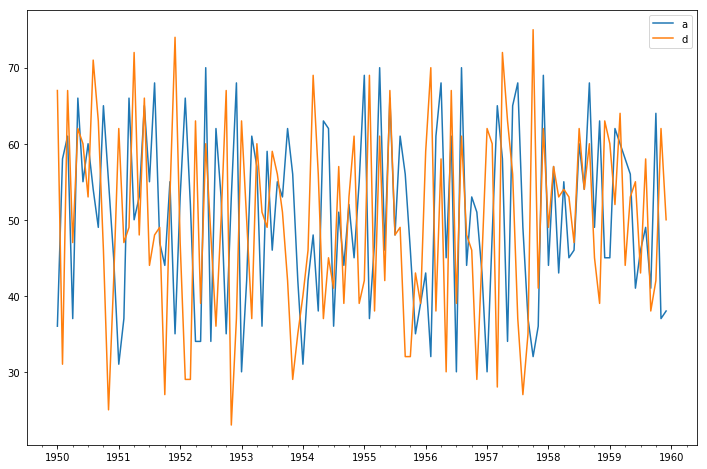

In [109]:
df3[['a','d']].plot(figsize = (12,8))

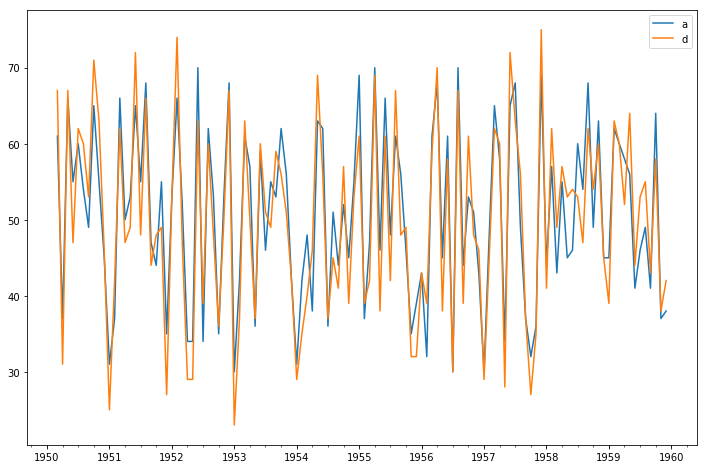

In [110]:
df3['a'].iloc[2:].plot(figsize=(12,8),legend = True)
df3['d'].shift(2).plot(legend = True)
#There's causuality in between two time series
#it's bit hard to see from eyes before. Hard to tell how many lags
#We can do a test to see if there's causuality

In [111]:
from statsmodels.tsa.stattools import grangercausalitytests

In [112]:
grangercausalitytests(df3[['a','d']],maxlag = 3);
#We can see extremely low p value on lag 2 & 3


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [113]:
grangercausalitytests(df3[['b','d']],maxlag = 3);
#Can't see low p-value


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


### 3. Evaluating Forecast
- AIC: evalutes a collrection of models and estimates model quality. Penalties are related to number of parameters used. 
- BIC: Similar to AIC but use Bayesian approach

In [114]:
np.random.seed(42)
#generate a random dataset to demonstrate
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns = ['test','predictions'])

In [115]:
df.head()

test  predictions
0    26           23
1    27           24
2    26           29
3    22           26
4    27           24

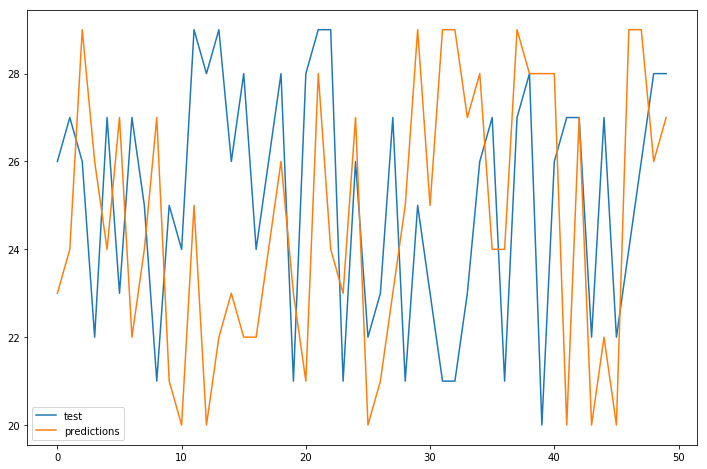

In [116]:
df.plot(figsize = (12,8))

In [117]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [118]:
mse(df['test'],df['predictions'])

17.02

In [119]:
meanabs(df['test'],df['predictions'])

3.54

In [120]:
df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'

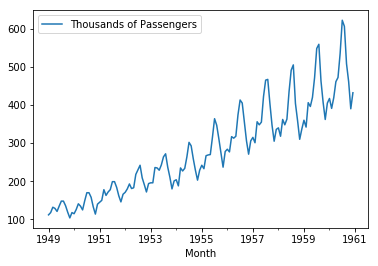

In [121]:
df.plot() #It might be hard to tell when the seasonality is happening

In [122]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

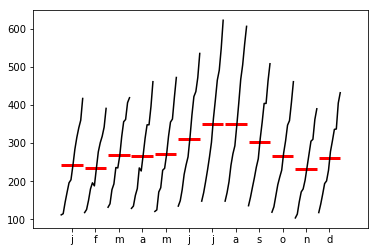

In [123]:
month_plot(df['Thousands of Passengers']); 
#No need to resample because the dataset is already monthly
#Group by and calculate the avg values

In [124]:
dfq = df['Thousands of Passengers'].resample(rule = 'Q').mean()

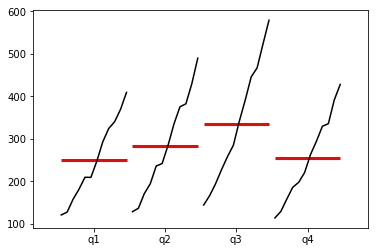

In [125]:
quarter_plot(dfq); #looks like the third quarter has more passengers

## ARIMA Order Selection
- AR: regression on previous y values
- MA: regression error (noise) is actually a linear combination of error terms
- I: differencing
- ARIMA (p,d,q) -> ARIMA model without seasoning

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [127]:
# Non stationary dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col = 'Month',parse_dates = True)
df1.index.freq = 'MS'

In [128]:
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col = 'Date',parse_dates = True)
df2.index.freq = 'D'

In [129]:
import six
import sys
import joblib
sys.modules['sklearn.externals.six'] = six
from pmdarima import auto_arima

In [133]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=10, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ch', stepwise=True, n_jobs=1, start_params=None, trend=None, method=None, transparams=True, solver='lbfgs', maxiter=50, disp=0, callback=None, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='warn', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The ``auto_arima`` function seeks to identify the most optimal
    parameters for an ``ARIMA`` model, and returns a fitted ARIMA model. This
    function is based on the commonly-used R functio

In [136]:
stepwise_fit = auto_arima(df2['Births'],start_p = 0, start_q = 0, max_p = 6, max_q = 3, seasonal = False,trace = True)
#trace will show the first few model the function is trying to fit
#It won't check all the way to max p&q. 
#When raise p and q higher but AIC sptays the same. 
#It will stop since it's no longer worth to increase p & q

Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.001 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.012 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.043 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.068 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.514, BIC=2480.000, Fit time=0.236 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.113 seconds
Total fit time: 0.622 seconds


In [137]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Tue, 25 May 2021   AIC                           2460.154
Time:                        21:44:43   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [138]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'],start_p=0,start_q=0,max=4,max_q = 4,
                         seasonal = True, trace = True,m=12) 
#seasonal true is default value
#m -> period for seasonal differencing. We need monthly
#SARIMA model

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1415.278, BIC=1421.203, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1299.259, BIC=1311.110, Fit time=0.187 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1398.827, BIC=1407.716, Fit time=0.068 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1301.228, BIC=1316.042, Fit time=0.232 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=1304.383, BIC=1313.271, Fit

In [139]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(0, 0, 1, 12)   Log Likelihood                -626.801
Date:                            Tue, 25 May 2021   AIC                           1267.601
Time:                                    21:48:36   BIC                           1288.341
Sample:                                         0   HQIC                          1276.029
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7024      0.168      4.169      0.000       0.372       1.033
ar.L1          1.4368      0.109     13.169      0.000       1.223       1.651
ar.L2         -0.7066      0.080     -8.815      0.000      -0.864      -0.549
ma.L1         -1.4832      0.174     -8.524      0.000      -1.824      -1.142
ma.L2          0.5033      0.175      2.877      0.004       0.160       0.846
ma.S.L12       0.7444      0.077      9.730      0.000       0.594       0.894
sigma2       345.6774     37.222      9.287      0.000     272.723     418.631
===================================================================================
Ljung-Box (Q):                      164.01   Jarque-Bera (JB):                10.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.46   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARMA and ARIMA

In [ ]:
import pandas as pd
import numpy as np

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [3]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [4]:
from pmdarima import auto_arima

In [5]:
df1 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col = 'Date',parse_dates = True)
df1.index.freq = 'D'
df1 = df1[:120]

In [6]:
df2 = pd.read_csv('../Data/TradeInventories.csv',index_col='Date',parse_dates = True)

## ARMA

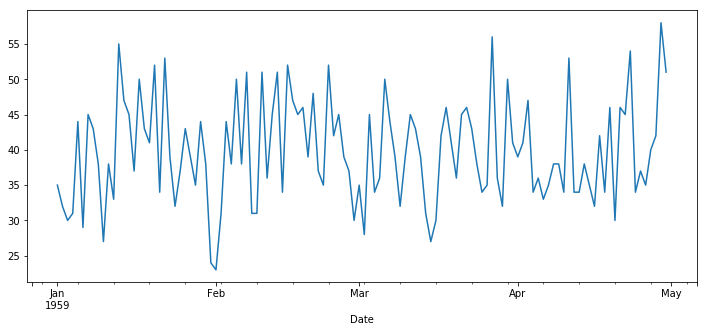

In [7]:
df1['Births'].plot(figsize = (12,5))

In [8]:
#Function for ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [9]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [10]:
auto_arima(df1['Births'],seasonal = False).summary()

C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 3); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 0, 3); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ig

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Thu, 27 May 2021   AIC                            822.741
Time:                        15:14:37   BIC                            839.466
Sample:                             0   HQIC                           829.533
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8163      0.108    368.766      0.000      39.605      40.028
ar.L1.y        1.8568      0.081     22.930      0.000       1.698       2.016
ar.L2.y       -0.8814      0.073    -12.029      0.000      -1.025      -0.738
ma.L1.y       -1.8633      0.109    -17.125      0.000      -2.077      -1.650
ma.L2.y        0.8633      0.108      8.019      0.000       0.652       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0533           -0.1582j            1.0652           -0.0237
AR.2            1.0533           +0.1582j            1.0652            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1584           +0.0000j            1.1584            0.0000
-----------------------------------------------------------------------------
"""

In [11]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [12]:
model = ARMA(train['Births'],order = (2,2))

In [13]:
results = model.fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Thu, 27 May 2021   AIC                            627.809
Time:                        15:14:37   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7433           +0.0000j            1.7433            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
start = len(train)
end = len(train)+len(test)-1

In [16]:
predictions = results.predict(start,end).rename('ARMA(2,2) Predictions')

In [17]:
predictions

1959-04-01    39.982208
1959-04-02    39.992606
1959-04-03    39.809819
1959-04-04    39.848165
1959-04-05    39.761527
1959-04-06    39.794244
1959-04-07    39.750489
1959-04-08    39.772822
1959-04-09    39.749649
1959-04-10    39.763655
1959-04-11    39.750979
1959-04-12    39.759420
1959-04-13    39.752342
1959-04-14    39.757325
1959-04-15    39.753323
1959-04-16    39.756232
1959-04-17    39.753952
1959-04-18    39.755639
1959-04-19    39.754335
1959-04-20    39.755311
1959-04-21    39.754563
1959-04-22    39.755126
1959-04-23    39.754696
1959-04-24    39.755021
1959-04-25    39.754773
1959-04-26    39.754960
1959-04-27    39.754818
1959-04-28    39.754926
1959-04-29    39.754844
1959-04-30    39.754906
Freq: D, Name: ARMA(2,2) Predictions, dtype: float64

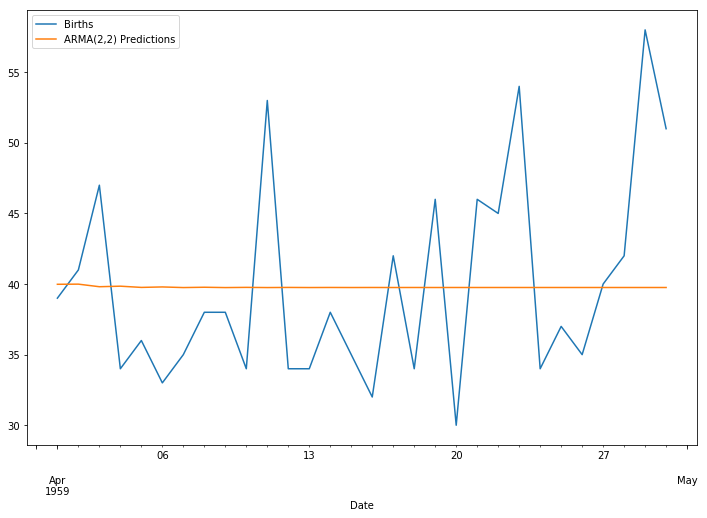

In [18]:
test["Births"].plot(figsize = (12,8),legend = True)
predictions.plot(legend = True)

In [19]:
test.mean()

Births    39.833333
dtype: float64

In [20]:
predictions.mean()
#Couldn't prediction the noise but can prediction the mean pretty well

39.77742245283519

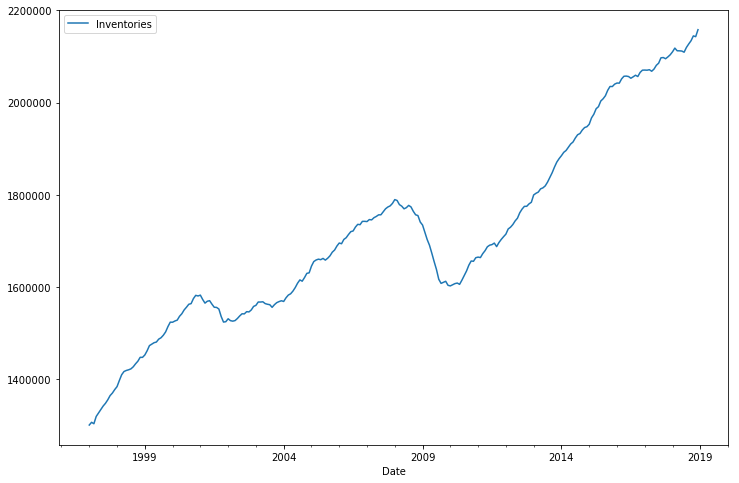

In [21]:
df2.plot(figsize = (12,8))

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

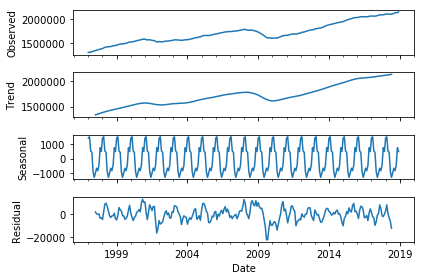

In [23]:
result = seasonal_decompose(df2['Inventories'],model = 'add')
result.plot();
#seasonal effect +-1000 doesn't seem to have a real effect compared to the scale of the data
#The magnitude is too small

In [27]:
auto_arima(df2['Inventories'],seasonal = False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.261
Date:                Thu, 27 May 2021   AIC                           5228.505
Time:                        15:14:58   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3456.7888   1312.745      2.633      0.009     883.856    6029.722
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5731      0.076     -7.544      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7448           +0.0000j            1.7448            0.0000
-----------------------------------------------------------------------------
"""

#### ACF & PACF plot reading and parameter selection demo
- May not need to use it later but just for demonstration

In [28]:
from statsmodels.tsa.statespace.tools import diff

In [29]:
df2['Diff_1'] = diff(df2['Inventories'],k_diff = 1)

In [30]:
adf_test(df2['Diff_1'])
#After one differencing the data is stationary, we pick I = 1

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


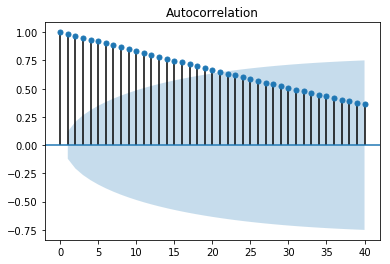

In [31]:
plot_acf(df2['Inventories'],lags = 40);
#https://people.duke.edu/~rnau/411arim3.htm
#Rule 6: If the PACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., 
#if the series appears slightly "underdifferenced"--then consider adding an AR term to the model. 
#The lag at which the PACF cuts off is the indicated number of AR terms.

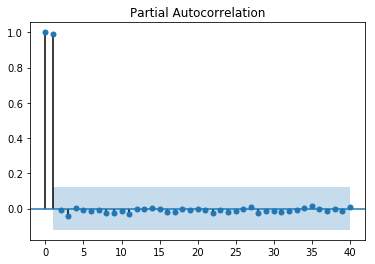

In [32]:
plot_pacf(df2['Inventories'],lags = 40);
#AR can be one because there's a sharpe cutoff

In [33]:
#AR = 1, I = 1, MA = 0 or 1

In [34]:
stepwise_fit = auto_arima(df2['Inventories'],start_p=0,start_q=0,max_p=2,max_q=2,
                         seasonal = False, trace = True)

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.047 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.014 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.841, Fit time=0.063 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.527, BIC=5247.388, Fit time=0.064 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.091 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.086 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.380 seconds


In [35]:
len(df2)

264

In [77]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [78]:
model = ARIMA(train['Inventories'],order = (1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.397
Method:                       css-mle   S.D. of innovations           4845.058
Date:                Thu, 27 May 2021   AIC                           4980.793
Time:                        15:51:13   BIC                           4994.895
Sample:                    02-01-1997   HQIC                          4986.468
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3165.3814   1345.228      2.353      0.019     528.783    5801.980
ar.L1.D.Inventories     0.9026      0.039     23.008      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7919           +0.0000j            1.7919            0.0000
-----------------------------------------------------------------------------
"""

In [79]:
start = len(train)
end = len(train)+len(test)-1

predictions = results.predict(start = start,end=end,typ = 'levels').rename('ARIMA(1,1,1) Predictions')
#select typ as levels instead of linear to return the original level value
#instead of the predicted differencing value

In [80]:
predictions

2018-01-01    2.107141e+06
2018-02-01    2.110510e+06
2018-03-01    2.113858e+06
2018-04-01    2.117189e+06
2018-05-01    2.120503e+06
2018-06-01    2.123804e+06
2018-07-01    2.127090e+06
2018-08-01    2.130366e+06
2018-09-01    2.133630e+06
2018-10-01    2.136885e+06
2018-11-01    2.140131e+06
2018-12-01    2.143369e+06
Freq: MS, Name: ARIMA(1,1,1) Predictions, dtype: float64

In [81]:
test

Inventories   Diff_1
Date                            
2018-01-01      2110158   6407.0
2018-02-01      2118199   8041.0
2018-03-01      2112427  -5772.0
2018-04-01      2112276   -151.0
2018-05-01      2111835   -441.0
2018-06-01      2109298  -2537.0
2018-07-01      2119618  10320.0
2018-08-01      2127170   7552.0
2018-09-01      2134172   7002.0
2018-10-01      2144639  10467.0
2018-11-01      2143001  -1638.0
2018-12-01      2158115  15114.0

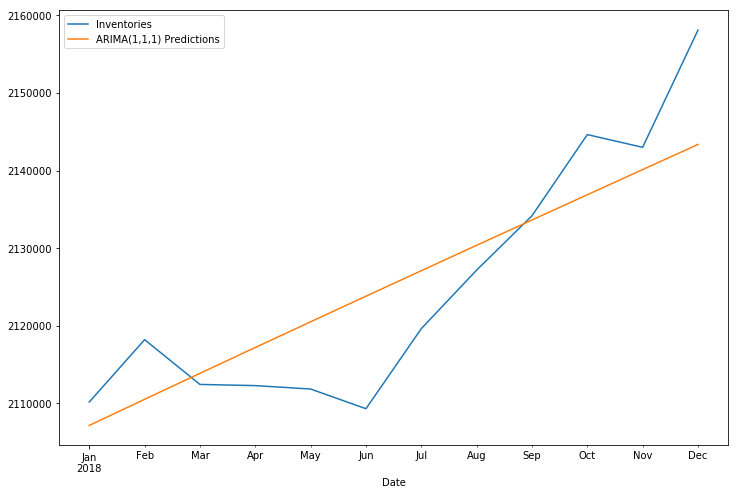

In [82]:
test['Inventories'].plot(legend = True,figsize = (12,8))
predictions.plot(legend = True)

In [83]:
from statsmodels.tools.eval_measures import rmse

In [84]:
error = rmse(test['Inventories'],predictions)

In [85]:
error

7810.8928125097655

In [86]:
test['Inventories'].mean()

2125075.6666666665

In [87]:
predictions.mean()

2125372.9638395607

## Forecast into unknown future

In [88]:
model = ARIMA(df2['Inventories'],order = (1,1,1))

In [89]:
results = model.fit()

In [90]:
fcast = results.predict(start = len(df2),end=len(df2)+11,typ='levels').rename('ARIMA(1,1,1)Forecast')

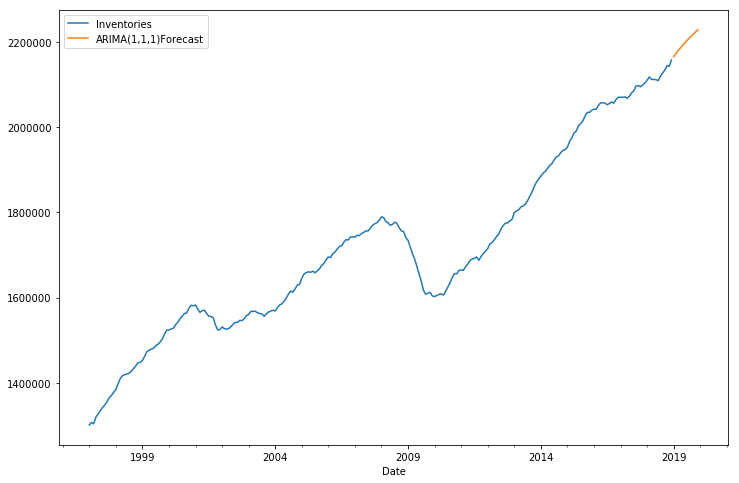

In [91]:
df2['Inventories'].plot(legend = True,figsize = (12,8))
fcast.plot(legend = True)

## SARIMA

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from pmdarima import auto_arima 

In [6]:
df = pd.read_csv('../Data/co2_mm_mlo.csv')

In [19]:
df.head() #want to use the first 2 col to create datatime index

year  month  decimal_date  average  interpolated
0  1958      3      1958.208   315.71        315.71
1  1958      4      1958.292   317.45        317.45
2  1958      5      1958.375   317.50        317.50
3  1958      6      1958.458      NaN        317.10
4  1958      7      1958.542   315.86        315.86

In [20]:
df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [21]:
df.head()

year  month  decimal_date  average  interpolated       date
0  1958      3      1958.208   315.71        315.71 1958-03-01
1  1958      4      1958.292   317.45        317.45 1958-04-01
2  1958      5      1958.375   317.50        317.50 1958-05-01
3  1958      6      1958.458      NaN        317.10 1958-06-01
4  1958      7      1958.542   315.86        315.86 1958-07-01

In [22]:
df.info()#confirm date is a datatime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
date            729 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.2 KB


In [23]:
df = df.set_index('date')

In [24]:
df.head()

year  month  decimal_date  average  interpolated
date                                                        
1958-03-01  1958      3      1958.208   315.71        315.71
1958-04-01  1958      4      1958.292   317.45        317.45
1958-05-01  1958      5      1958.375   317.50        317.50
1958-06-01  1958      6      1958.458      NaN        317.10
1958-07-01  1958      7      1958.542   315.86        315.86

In [25]:
df.index.freq = 'MS'

In [26]:
df.head()

year  month  decimal_date  average  interpolated
date                                                        
1958-03-01  1958      3      1958.208   315.71        315.71
1958-04-01  1958      4      1958.292   317.45        317.45
1958-05-01  1958      5      1958.375   317.50        317.50
1958-06-01  1958      6      1958.458      NaN        317.10
1958-07-01  1958      7      1958.542   315.86        315.86

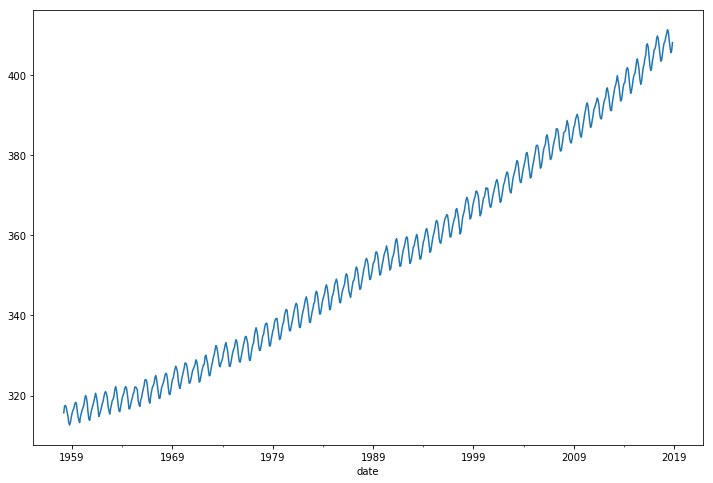

In [27]:
df['interpolated'].plot(figsize = (12,8))

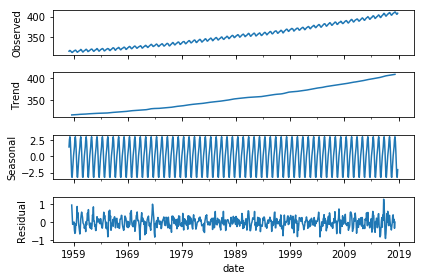

In [28]:
result = seasonal_decompose(df['interpolated'],model='add')
result.plot();

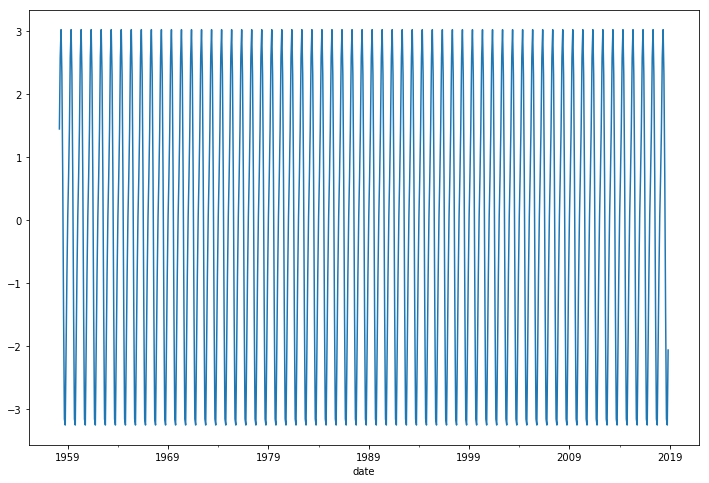

In [29]:
result.seasonal.plot(figsize = (12,8))

In [30]:
auto_arima(df['interpolated'],seasonal = True,m=12).summary() #m specify season cycles

C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWa

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -207.449
Date:                            Sat, 29 May 2021   AIC                            424.898
Time:                                    12:27:22   BIC                            447.850
Sample:                                         0   HQIC                           433.754
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.001      1.008      0.314      -0.001       0.002
ma.L1         -0.3804      0.034    -11.147      0.000      -0.447      -0.314
ar.S.L12       0.9995      0.000   3187.014      0.000       0.999       1.000
ma.S.L12      -0.8645      0.021    -40.320      0.000      -0.907      -0.823
sigma2         0.0963      0.005     20.364      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       52.20   Jarque-Bera (JB):                 3.74
Prob(Q):                              0.09   Prob(JB):                         0.15
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
len(df)

729

In [33]:
train = df.iloc[:717]

In [34]:
len(train)

717

In [35]:
test = df.iloc[717:]

In [36]:
model = SARIMAX(train['interpolated'],order = (0,1,1), seasonal_order = (1,0,1,12))

In [37]:
results = model.fit()

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.162
Date:                            Sat, 29 May 2021   AIC                            418.324
Time:                                    12:36:35   BIC                            436.618
Sample:                                03-01-1958   HQIC                           425.388
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3709      0.034    -10.785      0.000      -0.438      -0.303
ar.S.L12       0.9996      0.000   3005.176      0.000       0.999       1.000
ma.S.L12      -0.8631      0.023    -37.304      0.000      -0.908      -0.818
sigma2         0.0961      0.005     20.176      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.94   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.10   Prob(JB):                         0.16
Heteroskedasticity (H):               1.12   Skew:                            -0.02
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
results = model.fit()

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.162
Date:                            Sat, 29 May 2021   AIC                            418.324
Time:                                    12:36:37   BIC                            436.618
Sample:                                03-01-1958   HQIC                           425.388
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3709      0.034    -10.785      0.000      -0.438      -0.303
ar.S.L12       0.9996      0.000   3005.176      0.000       0.999       1.000
ma.S.L12      -0.8631      0.023    -37.304      0.000      -0.908      -0.818
sigma2         0.0961      0.005     20.176      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.94   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.10   Prob(JB):                         0.16
Heteroskedasticity (H):               1.12   Skew:                            -0.02
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
start = len(train)
end = len(train) + len(test) - 1

In [42]:
predictions = results.predict(start,end,typ='levels').rename('SARIMA Predictions')

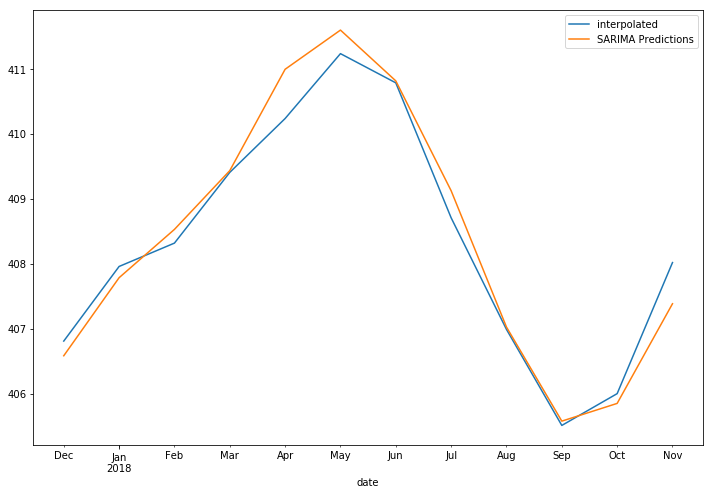

In [43]:
test['interpolated'].plot(legend=True,figsize = (12,8))
predictions.plot(legend = True)

In [44]:
from statsmodels.tools.eval_measures import rmse

In [45]:
error = rmse(test['interpolated'],predictions)

In [46]:
error

0.34642198167581273

In [47]:
test['interpolated'].mean()

408.3333333333333

### Forecast into the unknown future

In [48]:
model = SARIMAX(df['interpolated'],order = (0,1,1), seasonal_order = (1,0,1,12))
results = model.fit()

In [49]:
fcast = results.predict(len(df),len(df)+11,typ = 'levels').rename('SARIMA FORECAST')

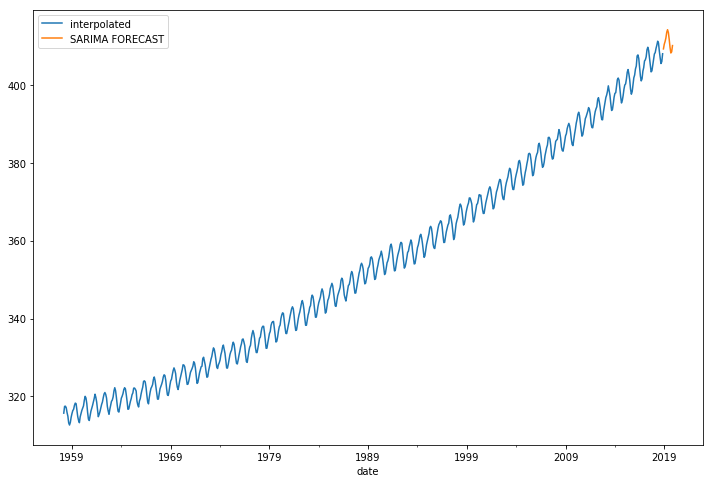

In [50]:
df['interpolated'].plot(legend = True,figsize = (12,8))
fcast.plot(legend = True)

## SARIMA with Exogenous Variables

- Predict customer number at restaurant. Maybe we have holiday info beside historical number
- You can also feature engineer based on your domain experience. E.g. Video game sale period
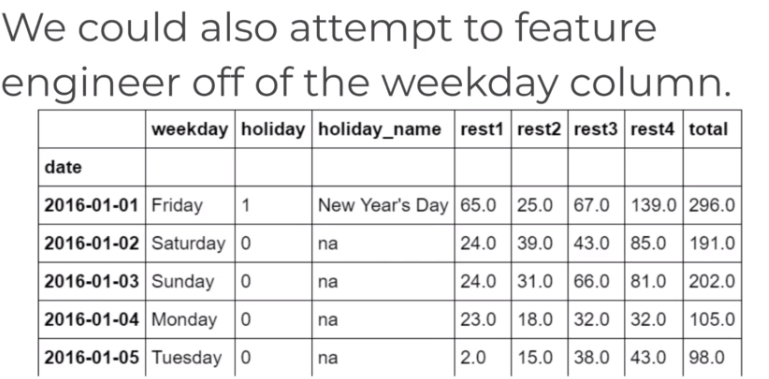

In [58]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Data/RestaurantVisitors.csv',index_col = 'date', parse_dates=True)

In [4]:
df.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day   65.0   25.0   67.0  139.0   
2016-01-02  Saturday        0              na   24.0   39.0   43.0   85.0   
2016-01-03    Sunday        0              na   24.0   31.0   66.0   81.0   
2016-01-04    Monday        0              na   23.0   18.0   32.0   32.0   
2016-01-05   Tuesday        0              na    2.0   15.0   38.0   43.0   

            total  
date               
2016-01-01  296.0  
2016-01-02  191.0  
2016-01-03  202.0  
2016-01-04  105.0  
2016-01-05   98.0

In [11]:
df.tail() #null value to forecast into for competition

weekday  holiday  holiday_name  rest1  rest2  rest3  rest4  \
date                                                                       
2017-05-27   Saturday        0            na    NaN    NaN    NaN    NaN   
2017-05-28     Sunday        0            na    NaN    NaN    NaN    NaN   
2017-05-29     Monday        1  Memorial Day    NaN    NaN    NaN    NaN   
2017-05-30    Tuesday        0            na    NaN    NaN    NaN    NaN   
2017-05-31  Wednesday        0            na    NaN    NaN    NaN    NaN   

            total  
date               
2017-05-27    NaN  
2017-05-28    NaN  
2017-05-29    NaN  
2017-05-30    NaN  
2017-05-31    NaN

In [12]:
df1 = df.dropna() 

In [13]:
df1.columns 

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [18]:
cols = ['rest1','rest2','rest3','rest4','total']

In [19]:
#Convert all relative cols in int
for column in cols:
    df1[column] = df1[column].astype(int)

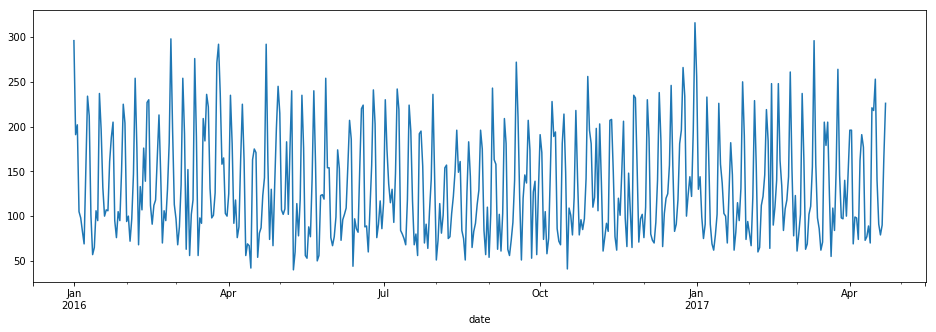

In [20]:
df1['total'].plot(figsize = (16,5))

In [21]:
df1.query('holiday==1').index
#Only return the dates of holidays

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [23]:
#or we can use
df1[df1['holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [27]:
ax = df1['total'].plot(figsize = (16,5))
for day in df1[df1['holiday']==1].index:
    ax.axvline(x=day,color = 'black',alpha = 0.5);
#Add the line on chart to indicate holidays
#It's visually unclear to see if there are peaks or dips just from the graph

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

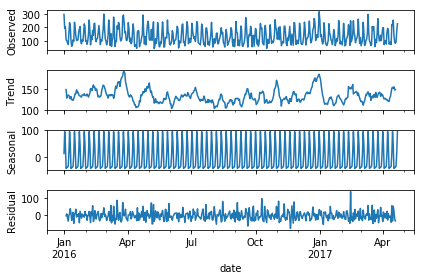

In [30]:
result = seasonal_decompose(df1['total'])
result.plot();

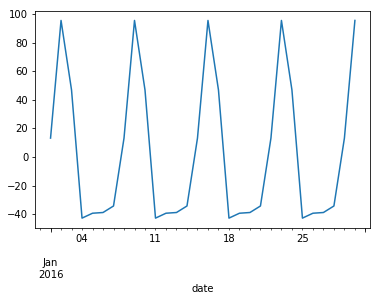

In [31]:
result.seasonal[:30].plot() #looks like 7days per season

In [32]:
#We will just try a seasonal ARIMA model 
#and then later we will try one with exogenous variable

In [33]:
len(df1)

478

In [34]:
train = df1.iloc[:436]

In [35]:
test = df1.iloc[436:]

In [36]:
from pmdarima import auto_arima

In [38]:
auto_arima(df1['total'],seasonal = True, m = 7).summary()

C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rapeng\Anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWa

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Mon, 07 Jun 2021   AIC                           4845.442
Time:                                   09:41:47   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5665      4.363      4.714      0.000      12.015      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.4095     86.680     16.468      0.000    1257.520    1597.299
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [132]:
#Pass in the result from above SARIMAX model
model = SARIMAX(train['total'],order = (1,0,0),seasonal_order = (2,0,0,7))
               #enforce_invertibility = False)

#enforce_invertibility set equals to false to avoid 'value error'

In [133]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Mon, 07 Jun 2021   AIC                           4457.403
Time:                                   10:35:44   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [134]:
start = len(train)
end = len(train) + len(test) - 1

In [135]:
predictions = results.predict(start,end).rename('SARIMA Model')

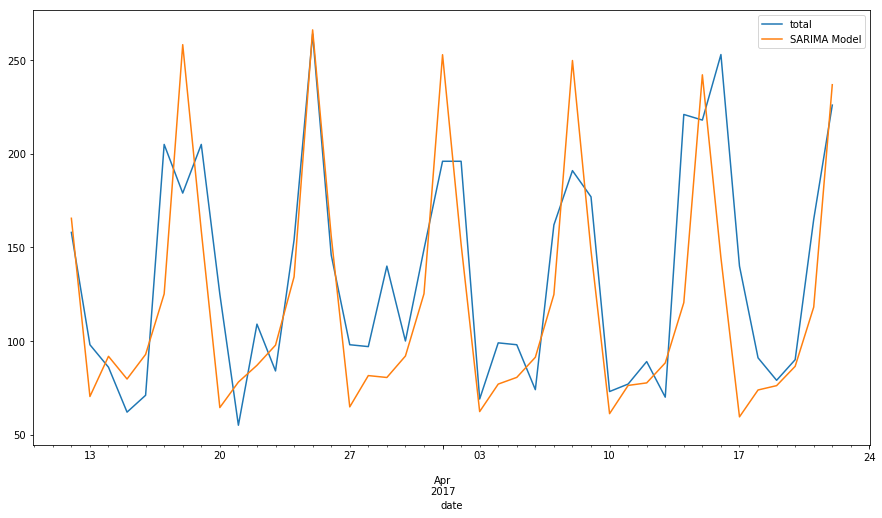

In [136]:
test['total'].plot(legend = True, figsize = (15,8))
predictions.plot(legend = True)
#First peak and second last doesn't seem like very good predictions

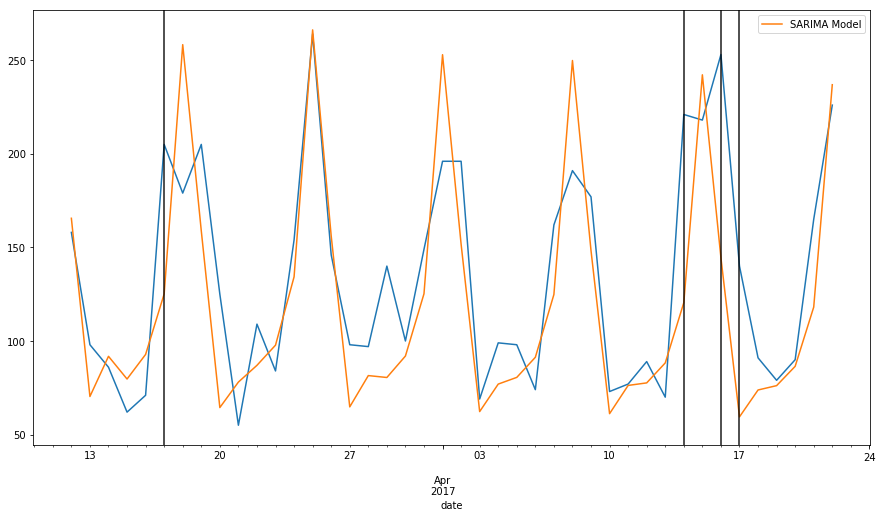

In [137]:
#We can mark out the holidays and see what happened
ax = test['total'].plot(figsize = (15,8))
predictions.plot(legend = True)

for day in test[test['holiday']==1].index:
    ax.axvline(x=day,color = 'black',alpha = 0.9);

In [138]:
from statsmodels.tools.eval_measures import rmse

In [139]:
rmse(test['total'],predictions)

41.2631549339802

In [140]:
predictions.mean()

120.72598713768535

In [141]:
test['total'].mean()

134.26190476190476

### Add in holiday variable as an exogenous variable (SARIMAX)
- For SARIMAX, we need to provide the Exo variable in the future date
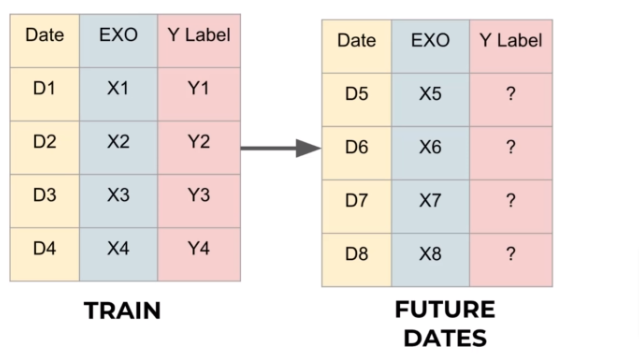

In [55]:
print(type(df1['holiday']))
print(type(df1[['holiday']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [144]:
auto_arima(df1['total'],exogenous = df1[['holiday']],seasonal = True, m=7).summary()
#Need to input a dataframe under exogenous, so we add another bracket

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2348.652
Date:                           Mon, 07 Jun 2021   AIC                           4709.305
Time:                                   10:44:10   BIC                           4734.322
Sample:                                        0   HQIC                          4719.140
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5531      4.274      2.703      0.007       3.177      19.929
x1            74.8290      4.545     16.464      0.000      65.921      83.737
ma.L1          0.1782      0.051      3.474      0.001       0.078       0.279
ar.S.L7        0.5060      0.045     11.234      0.000       0.418       0.594
ar.S.L14       0.3843      0.043      8.983      0.000       0.300       0.468
sigma2      1141.9698     80.185     14.242      0.000     984.810    1299.130
===================================================================================
Ljung-Box (Q):                       85.09   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Train SARIMAX

In [169]:
model = SARIMAX(train['total'],exog = train[['holiday']],order=(1,0,1),seasonal_order=(1,0,1,7))
                #,enforce_invertibility = False)
#order from the video

In [170]:
result = model.fit()

In [171]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2093.695
Date:                           Mon, 07 Jun 2021   AIC                           4199.389
Time:                                   11:39:08   BIC                           4223.855
Sample:                               01-01-2016   HQIC                          4209.045
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.3530      4.063     17.070      0.000      61.390      77.316
ar.L1          0.9995      0.001    733.340      0.000       0.997       1.002
ma.L1         -0.9969      0.007   -141.559      0.000      -1.011      -0.983
ar.S.L7        0.9997      0.000   2256.524      0.000       0.999       1.001
ma.S.L7       -0.9514      0.030    -31.651      0.000      -1.010      -0.892
sigma2       811.5661     47.109     17.227      0.000     719.234     903.898
===================================================================================
Ljung-Box (Q):                       55.03   Jarque-Bera (JB):                22.91
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.28
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [172]:
start = len(train)
end = len(train) + len(test) -1

In [173]:
predictions = result.predict(start,end,exog = test[['holiday']]).rename('SARIMAX with Exog')

In [174]:
ax = predictions.plot(figsize=(12,8),legend=True)
test['total'].plot(legend=True)

In [218]:
ax = test['total'].plot(figsize = (15,8))
predictions.plot(legend = True)

for day in test[test['holiday']==1].index:
    ax.axvline(x=day,color = 'black',alpha = 0.9);

In [219]:
rmse(test['total'],predictions)

22.919432083292364

In [220]:
model = SARIMAX(df1['total'],exog = df1[['holiday']],order=(1,0,1),seasonal_order=(1,0,1,7),enforce_invertility = False)

In [221]:
results = model.fit()

In [222]:
#grab future exo variables
exog_forecast = df[478:][['holiday']] 
#Use double bracket to select in order to keep it as a df

In [223]:
len(exog_forecast)

39

In [224]:
fcast = results.predict(len(df1),len(df1)+38,exog = exog_forecast).rename("FINAL SARIMAX FORECAST")

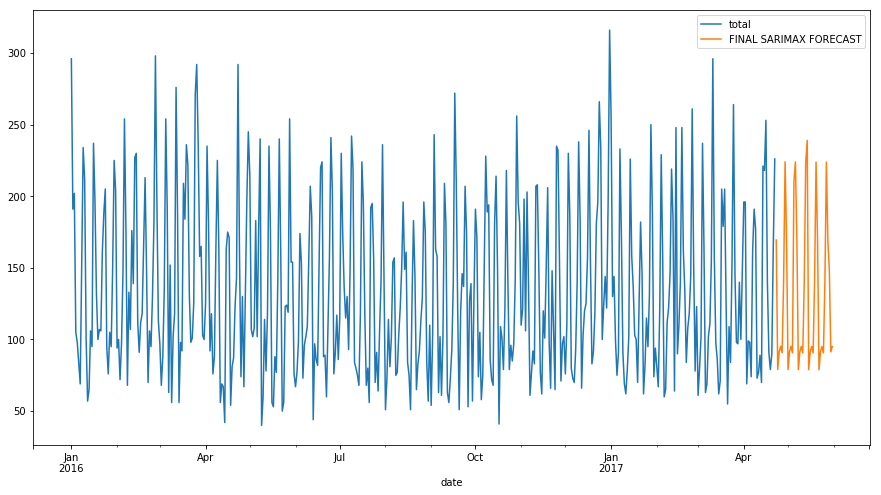

In [225]:
df1['total'].plot(figsize=(15,8),legend = True)
fcast.plot(legend=True)

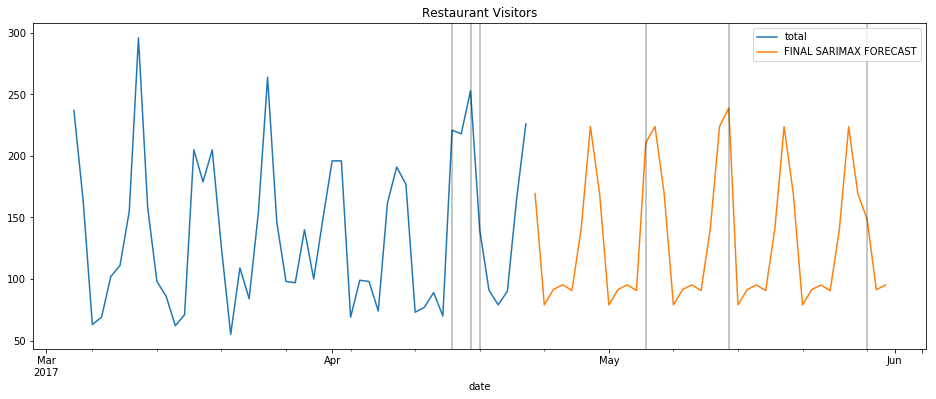

In [236]:
# Plot the forecast alongside historical values
ax = df1['total'][-50:].plot(legend=True,figsize=(16,6),title=title)
fcast.plot(legend=True)

for x in df.iloc[-50:].query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);

## Vector Autoregression
In our previous SARIMAX example, the forecast variable $y_t$ was influenced by the exogenous predictor variable, but not vice versa. That is, the occurrence of a holiday affected restaurant patronage but not the other way around.

However, there are some cases where variables affect each other. <a href='https://otexts.com/fpp2/VAR.html'>Forecasting: Principles and Practice</a> describes a case where changes in personal consumption expenditures $C_t$ were forecast based on changes in personal disposable income $I_t$.
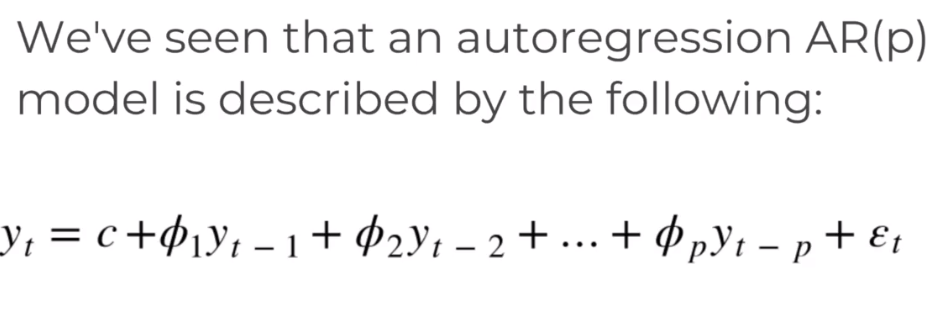
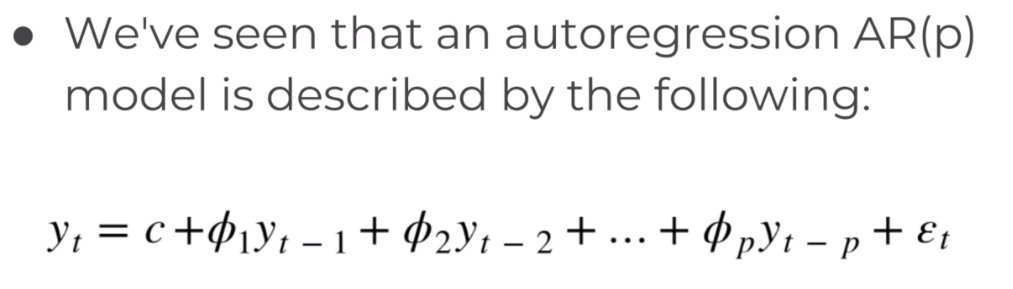
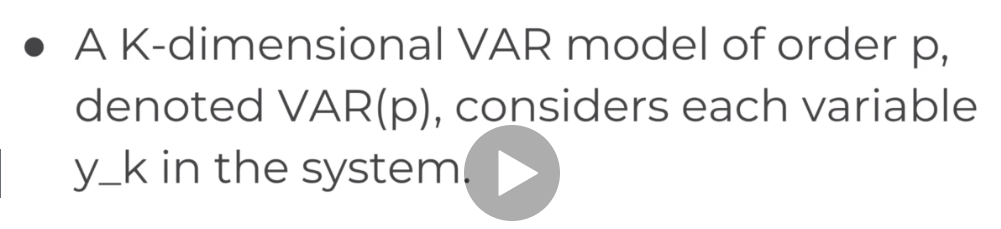
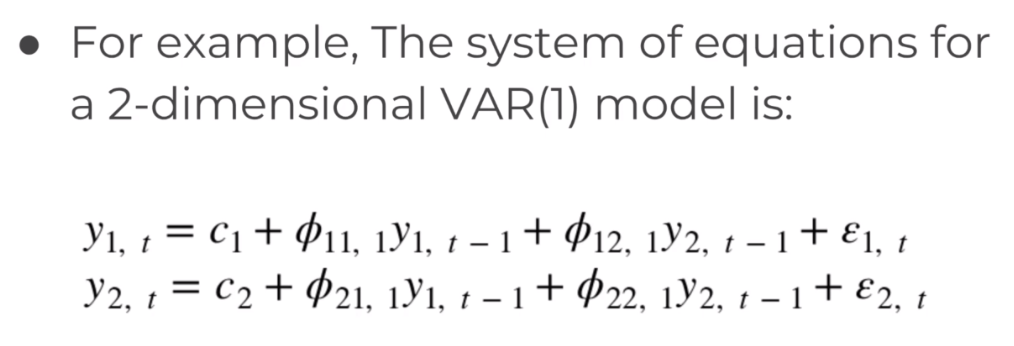

- 相当于两个Variables互相Regress，互相用彼此过去的value建模

Example: we use dataset to model between how much people spend and how much they earn


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('../Data/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('../Data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [4]:
df.head()

Money
Date              
1995-01-01  3492.4
1995-02-01  3489.9
1995-03-01  3491.1
1995-04-01  3499.2
1995-05-01  3524.2

In [5]:
sp.head()

Spending
Date                
1995-01-01    4851.2
1995-02-01    4850.8
1995-03-01    4885.4
1995-04-01    4890.2
1995-05-01    4933.1

In [6]:
df = df.join(sp) #default joining by index

In [11]:
df.head()

Money  Spending
Date                        
1995-01-01  3492.4    4851.2
1995-02-01  3489.9    4850.8
1995-03-01  3491.1    4885.4
1995-04-01  3499.2    4890.2
1995-05-01  3524.2    4933.1

In [8]:
df.shape

(252, 2)

In [9]:
df = df.dropna()

In [10]:
df.shape

(252, 2)

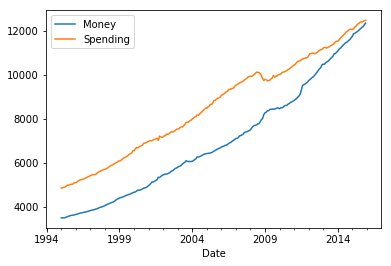

In [12]:
df.plot()

In [13]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [14]:
#we need to test if the series are stationary
adf_test(df['Money'],title='Money')

Augmented Dickey-Fuller Test: Money
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [15]:
adf_test(df['Spending'],title='Spending')

Augmented Dickey-Fuller Test: Spending
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [16]:
df_transformed = df.diff() 
#Once called diff, two cols will be differecing together

In [17]:
adf_test(df_transformed['Money'])
#still not stationary on the money column

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [18]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [21]:
df_transformed = df_transformed.diff().dropna()#differencing twice
#later one we will undo the transformation

In [22]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [23]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [25]:
df_transformed.shape #Two rows less than the original data

(250, 2)

In [26]:
#Take the last 12 as test and the ones before as train
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

### Grid Search for Order p AR of VAR model

In [27]:
model = VAR(train)
for p in [1,2,3,4,5,6,7]: #range(8)
    
    results = model.fit(p)
    print(f'Order {p}')
    print(f'AIC: {results.aic}')
    print('\n')#new line

Order 1
AIC: 14.178610495220896


Order 2
AIC: 13.955189367163703


Order 3
AIC: 13.849518291541038


Order 4
AIC: 13.827950574458281


Order 5
AIC: 13.78730034460964


Order 6
AIC: 13.799076756885809


Order 7
AIC: 13.79763872791397




In [28]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Jun, 2021
Time:                     15:11:00
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [31]:
#Grab 5 lagged values before the test starts
#numpy array
lagged_values = train.values[-5:] #numpy array when use values() function

In [32]:
lagged_values

array([[-31.9,  40.3],
       [  5.6, -70.7],
       [ 25.5,  52.5],
       [-21.3, -37.2],
       [ 39.5, -17.8]])

In [35]:
z = results.forecast(y=lagged_values,steps = 12)

In [36]:
z #forecast next 12 values

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [37]:
idx = pd.date_range('2015-01-01',periods = 12, freq = 'MS')
#create index range where our index of test set starts

In [38]:
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [40]:
df_forecast = pd.DataFrame(data=z,index=idx,columns=['Money_2d','Spending_2d'])

In [41]:
df_forecast #This is the forecast of the second differencing value

Money_2d  Spending_2d
2015-01-01 -16.995276    36.149820
2015-02-01  -3.174038   -11.450298
2015-03-01  -0.377725    -6.684969
2015-04-01  -2.602233     5.479458
2015-05-01   4.228557    -2.443365
2015-06-01   1.559393     0.387639
2015-07-01  -0.998410     3.883680
2015-08-01   0.364510    -2.356101
2015-09-01  -1.210627    -1.224147
2015-10-01   0.225877     0.786927
2015-11-01   1.338939     0.180974
2015-12-01  -0.218585     0.212750

 recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the nobs variable we defined during the train/test/split step.



## Invert the Transformation
Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the <tt>nobs</tt> variable we defined during the train/test/split step.

In [45]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [46]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [47]:
df_forecast.head()

Money_2d  Spending_2d    Money1d  MoneyForecast  Spending1d  \
2015-01-01 -16.995276    36.149820  61.604724   11731.704724   46.749820   
2015-02-01  -3.174038   -11.450298  58.430686   11790.135410   35.299522   
2015-03-01  -0.377725    -6.684969  58.052961   11848.188371   28.614552   
2015-04-01  -2.602233     5.479458  55.450728   11903.639099   34.094010   
2015-05-01   4.228557    -2.443365  59.679285   11963.318384   31.650645   

            SpendingForecast  
2015-01-01      12108.749820  
2015-02-01      12144.049342  
2015-03-01      12172.663894  
2015-04-01      12206.757904  
2015-05-01      12238.408549

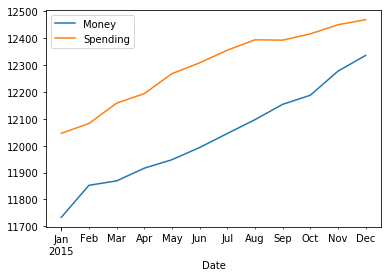

In [49]:
#Grab the test rannge from the original df before differencing
test_range = df[-nobs:]
test_range.plot()

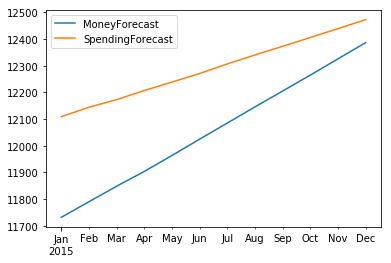

In [52]:
df_forecast[['MoneyForecast','SpendingForecast']].plot()

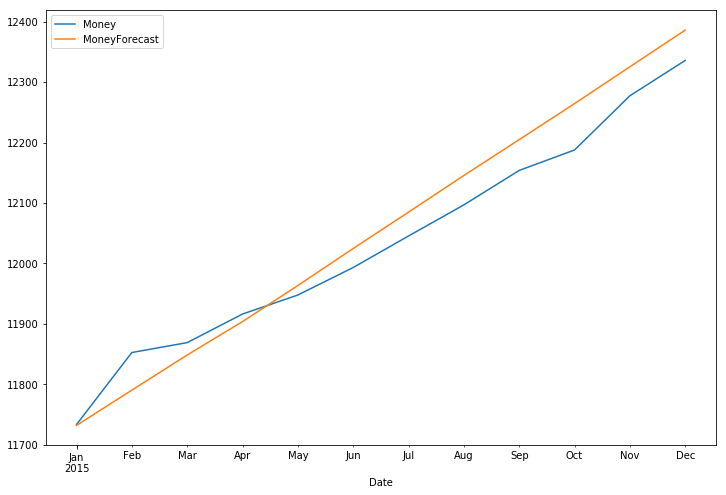

In [53]:
#Comparison test and prediction data
test_range['Money'].plot(legend = True,figsize =(12,8))
df_forecast['MoneyForecast'].plot(legend = True)

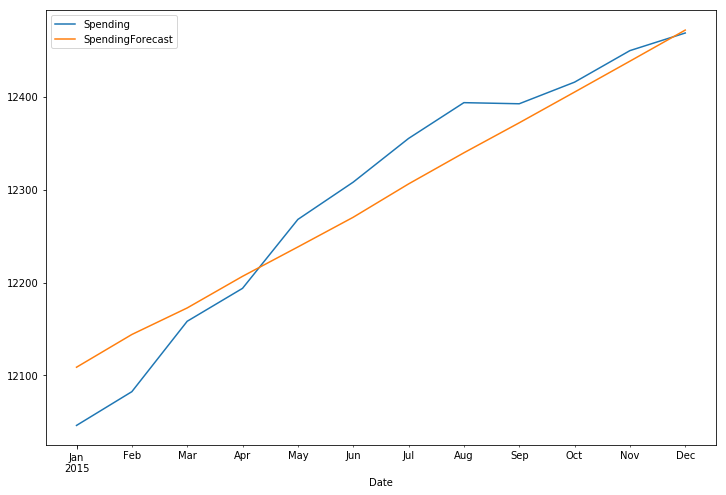

In [54]:
test_range['Spending'].plot(legend = True,figsize =(12,8))
df_forecast['SpendingForecast'].plot(legend = True)

In [56]:
rmse(test_range['Money'],df_forecast['MoneyForecast'])

43.71049653558893

In [58]:
test_range['Money'].mean()

12034.008333333333

In [59]:
rmse(test_range['Spending'],df_forecast['SpendingForecast'])

37.00117516940808

In [60]:
test_range['Spending'].mean()

12294.533333333335

## VARMA Model
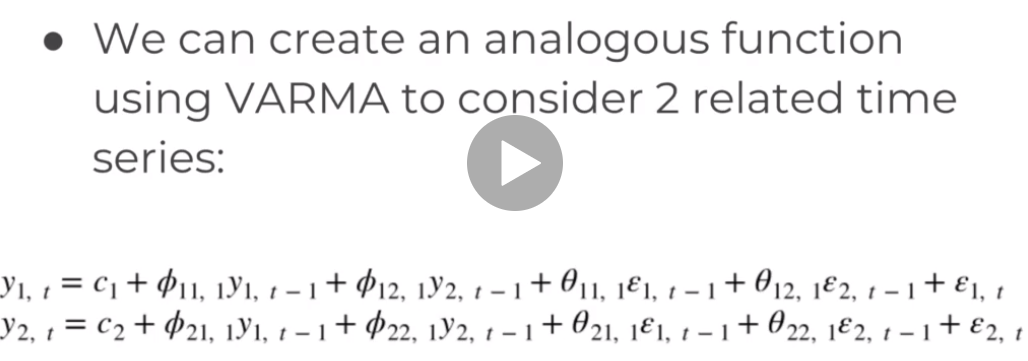
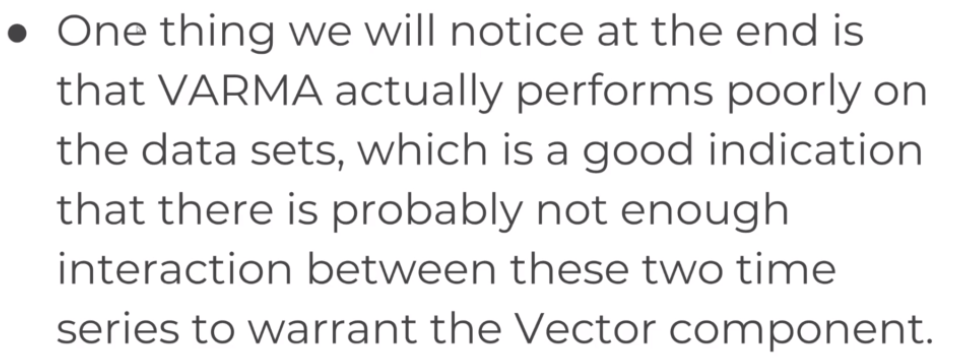

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
#VARMAX is the function we want to call to perform VARMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('../Data/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('../Data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [2]:
df = df.join(sp)
df.head()

Money  Spending
Date                        
1995-01-01  3492.4    4851.2
1995-02-01  3489.9    4850.8
1995-03-01  3491.1    4885.4
1995-04-01  3499.2    4890.2
1995-05-01  3524.2    4933.1

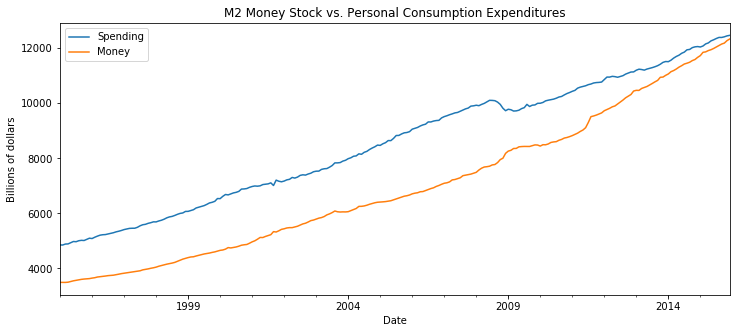

In [3]:
title = 'M2 Money Stock vs. Personal Consumption Expenditures'
ylabel='Billions of dollars'
xlabel=''

ax = df['Spending'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Money'].plot(legend=True);

In [4]:
# INCLUDED HERE IF YOU CHOOSE TO USE IT
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [5]:
auto_arima(df['Money'],maxiter=1000)

ARIMA(callback=None, disp=0, maxiter=1000, method=None, order=(1, 2, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

In [6]:
auto_arima(df['Spending'],maxiter=1000)

ARIMA(callback=None, disp=0, maxiter=1000, method=None, order=(1, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

It looks like a VARMA(1,2) model is recommended. Note that the  𝑑  term (2 for Money, 1 for Spending) is about to be addressed by transforming the data to make it stationary. As before we'll apply a second order difference.

In [7]:
df_transformed = df.diff().diff()
df_transformed = df_transformed.dropna()
df_transformed.head()

Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7

### Train/test/split
It is useful to define a number of observations variable for our test set. For this analysis, let's use 12 months.

In [8]:
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

print(train.shape)
print(test.shape)

(238, 2)
(12, 2)


### Fit the model

In [9]:
model = VARMAX(train, order=(1,2), trend='c')
results = model.fit(maxiter=1000, disp=False)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                            
=================================================================================
Dep. Variable:     ['Money', 'Spending']   No. Observations:                  238
Model:                        VARMA(1,2)   Log Likelihood               -2286.473
                             + intercept   AIC                           4606.945
Date:                   Tue, 15 Jun 2021   BIC                           4665.974
Time:                           11:28:07   HQIC                          4630.735
Sample:                       03-01-1995                                         
                            - 12-01-2014                                         
Covariance Type:                     opg                                         
===================================================================================
Ljung-Box (Q):                68.30, 27.83   Jarque-Bera (JB):       560.04, 125.13
Prob(Q):                        0.00, 0.93   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         5.68, 2.91   Skew:                      1.34, -0.36
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                  10.02, 6.48
                            Results for equation Money                            
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1752      0.725      0.242      0.809      -1.245       1.595
L1.Money          -1.0331      3.470     -0.298      0.766      -7.834       5.768
L1.Spending        1.9533      6.188      0.316      0.752     -10.174      14.081
L1.e(Money)        0.2681      7.910      0.034      0.973     -15.235      15.771
L1.e(Spending)    -2.0757      6.405     -0.324      0.746     -14.629      10.478
L2.e(Money)       -1.2637      9.467     -0.133      0.894     -19.819      17.292
L2.e(Spending)     1.8346      5.906      0.311      0.756      -9.742      13.411
                          Results for equation Spending                           
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0826      0.129      0.642      0.521      -0.170       0.335
L1.Money          -0.2351      2.075     -0.113      0.910      -4.302       3.832
L1.Spending        0.5470      3.507      0.156      0.876      -6.326       7.420
L1.e(Money)        0.3469      2.132      0.163      0.871      -3.832       4.526
L1.e(Spending)    -1.5076      3.488     -0.432      0.666      -8.345       5.330
L2.e(Money)       -0.3478      3.225     -0.108      0.914      -6.668       5.973
L2.e(Spending)     0.5547      3.134      0.177      0.860      -5.588       6.697
                                  Error covariance matrix                                  
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
sqrt.var.Money             26.0298     83.908      0.310      0.756    -138.426     190.486
sqrt.cov.Money.Spending   -10.5863     37.362     -0.283      0.777     -83.815      62.642
sqrt.var.Spending          32.8886     12.120      2.714      0.007       9.135      56.643
===========================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predict the next 12 values

In [10]:
df_forecast = results.forecast(12)
df_forecast #second difference

Money   Spending
2015-01-01 -12.580972  37.068600
2015-02-01 -11.121685  -5.026797
2015-03-01   1.845569  -0.052468
2015-04-01  -1.833859  -0.380001
2015-05-01   1.327438   0.305884
2015-06-01  -0.598615  -0.062152
2015-07-01   0.672219   0.189345
2015-08-01  -0.149372   0.028143
2015-09-01   0.384500   0.133120
2015-10-01   0.038033   0.065030
2015-11-01   0.262952   0.109239
2015-12-01   0.116951   0.080543

In [13]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money'].cumsum()

In [14]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending'].cumsum()

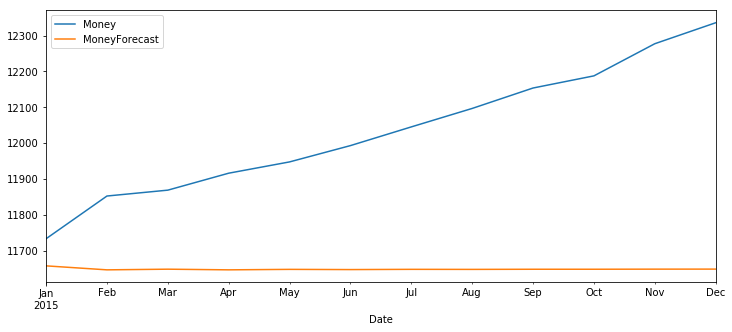

In [15]:
df_forecast
pd.concat([df.iloc[-12:],df_forecast[['MoneyForecast','SpendingForecast']]],axis=1)
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

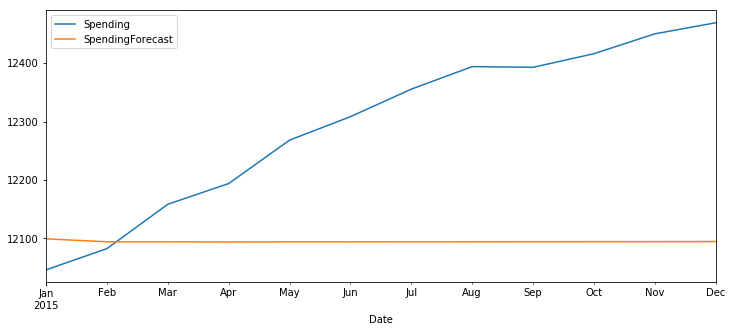

In [16]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

In [17]:
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 423.687


In [18]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 243.473


<strong>CONCLUSION:</strong> It looks like the VARMA(1,2) model did a relatively poor job compared to simpler alternatives. This tells us that there is little or no interdepence between Money Stock and Personal Consumption Expenditures, at least for the timespan we investigated. This is helpful! By fitting a model and getting poor results we know more about the data than we did before.

- Try simple first and then compare different models
- Sometimes a simple model on a single series might work better than the complicated ones like VARMA